1. 시그모이드, 하이퍼볼릭 탄젠트(tanh), ReLU 세 가지 활성화 함수를 직접 정의하고, -10부터 10까지 균일한 구간으로 생성한 100개의 입력값에 대해 각 활성화 함수를 적용한 출력을 계산하고, 결과를 그래프로 시각화하세요.
1-1. (연구 보고서 필수 조건)
- 각 활성화 함수의 수학적 정의
- 출력 그래프와 특징(예: 포화 영역, 기울기 소실 여부, 음수 처리 방식)
- 딥러닝에서 해당 활성화 함수를 사용하는 이유와 한계

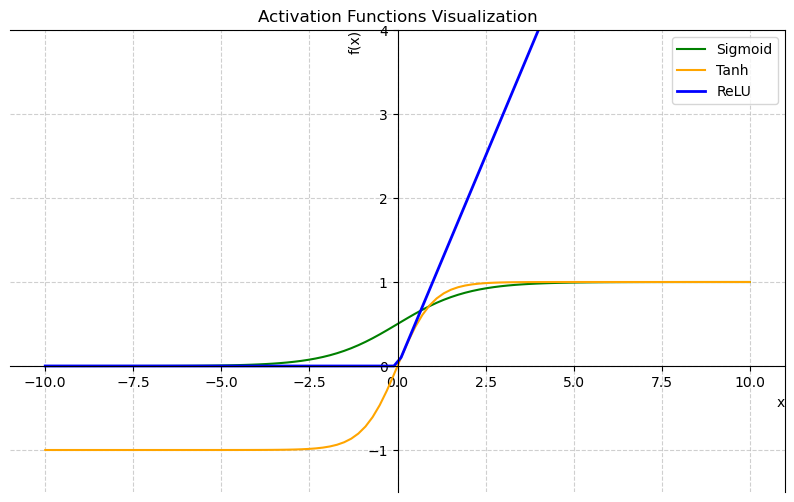

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. -10 ~ 10 까지 균일한 구간으로 100개의 값 생성
x = np.linspace(-10, 10, 100)

# 2. 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# 3. 생성한 데이터에 각 함수들을 적용
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

# 4. 적용한 결과 그래프로 시각화
plt.figure(figsize=(10, 6))
ax = plt.gca() # Get Current Axes

# --- 그래프 축을 중앙으로 이동 ---
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero') 
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')     
# --------------------------------

# 각 함수 플로팅
plt.plot(x, y_sigmoid, label='Sigmoid', color='green')
plt.plot(x, y_tanh, label='Tanh', color='orange')
plt.plot(x, y_relu, label='ReLU', color='blue', linewidth=2)

# 그래프 설정
plt.title("Activation Functions Visualization")
plt.xlabel("x", loc='right') # x축 레이블 오른쪽 정렬
plt.ylabel("f(x)", loc='top') # y축 레이블 위쪽 정렬
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# y축 범위 조절 (ReLU가 너무 커서 Tanh, Sigmoid가 안 보이는 것 방지)
plt.ylim(-1.5, 4) 

plt.show()


2. XOR 문제와는 다른 비선형 데이터셋(예: make_moons, make_circles)을 생성하고, 입력층, 은닉층(활성화 함수 포함), 출력층으로 구성된 MLP(다층 퍼셉트론) 모델을 설계하고 학습시켜 분류를 수행하세요.
2-1. (연구 보고서 필수 조건)
- 데이터셋 분포 시각화와 난이도 설명
- 모델 구조(층 개수, 뉴런 수, 활성화 함수 선택 근거)
- 학습 결과(손실 감소 곡선, 정확도, 결정 경계 시각화)
- 모델이 선형 모델과 비교해 가지는 강점에 대한 분석

X shape: torch.Size([1000, 2])
y shape: torch.Size([1000, 1])


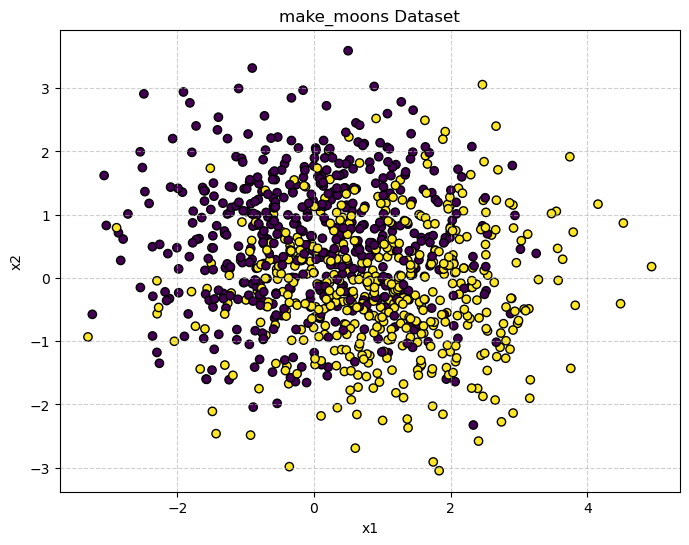

--- 모델 구조 ---
MLP(
  (hidden_layer1): Linear(in_features=2, out_features=30, bias=True)
  (hidden_layer2): Linear(in_features=30, out_features=30, bias=True)
  (output_layer): Linear(in_features=30, out_features=1, bias=True)
  (activation): Sigmoid()
  (output_activation): Sigmoid()
)
------------------
--- 모델 훈련 시작 ---
Epoch 1000/10000, Loss: 0.562823
Epoch 2000/10000, Loss: 0.560465
Epoch 3000/10000, Loss: 0.558610
Epoch 4000/10000, Loss: 0.558131
Epoch 5000/10000, Loss: 0.557738
Epoch 6000/10000, Loss: 0.556622
Epoch 7000/10000, Loss: 0.554931
Epoch 8000/10000, Loss: 0.553675
Epoch 9000/10000, Loss: 0.552727
Epoch 10000/10000, Loss: 0.552089
--- 모델 훈련 완료 ---

입력 데이터:
[[-0.5932415   1.1284246 ]
 [ 2.027713    0.2747332 ]
 [ 0.21688668  1.9356362 ]
 [-1.3043679  -1.3780348 ]
 [-0.6806828   0.6155112 ]
 [ 1.0529453   1.1797514 ]
 [ 0.17862888 -0.0989201 ]
 [-0.5911686   1.0065747 ]
 [ 1.3175862  -0.5906927 ]
 [ 1.1987764   1.7902956 ]]

실제 정답 (y):
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 

In [ ]:
# 비선형 데이터셋 불러오고 시각화
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
import torch.optim as optim

# make_moons 데이터셋 생성
    # n_samples: 총 데이터 포인트 개수
    # noise: 노이즈(흩어짐) 정도 (0은 완벽한 선)
    # random_state: 재현을 위한 시드값 (실행할 때마다 동일한 결과 보장)
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,   # 80% 중 25%를 검증 세트로 (전체 기준 20%)
    random_state=42   # 동일한 시드 값
)

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X, dtype=torch.float32)
y_test = torch.tensor(y, dtype=torch.float32).view(-1, 1)

print("X shape:", X.shape) # (200, 2) -> 200개의 샘플, 2개의 특성
print("y shape:", y.shape) # (200,) -> 200개의 레이블

# 데이터 시각화
plt.figure(figsize=(8, 6))
# y 값(0 또는 1)에 따라 색상을 다르게 하여 산점도(scatter) 그리기
# c=y : y 값이 0이면 한 색, 1이면 다른 색으로 자동 지정
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("make_moons Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# MLP 모델 정의 (입력 -> 은닉 -> 출력)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()

        # 입력 -> 은닉층 (가중치 W1, b1 포함)
        self.hidden_layer1 = nn.Linear(input_size, hidden_size)

        # 은닉층1 -> 은닉층2 (가중치 W1, b1 포함)
        self.hidden_layer2 = nn.Linear(hidden_size, hidden_size)

        # 은닉층2 -> 출력층 (가중치 W2, b2 포함)
        self.output_layer = nn.Linear(hidden_size, output_size)

        # 은닉층의 활성화 함수
        self.activation = nn.ReLU() # 또는 nn.ReLU() 사용 가능


    def forward(self, x):
        """순전파 (Forward Propagation)"""
        # 1. 입력 -> 은닉층1
        z1 = self.hidden_layer1(x)
        a1 = self.activation(z1) # 활성화함수 적용

        # 2. 은닉층1 -> 은닉층2
        z2 = self.hidden_layer2(a1)
        a2 = self.activation(z2) # 활성화함수 적용

        # 3. 은닉층2 -> 출력층
        z3 = self.output_layer(a2)
      #  a3 = self.output_activation(z3)
        return z3

# 3. 모델, 손실 함수, 옵티마이저 초기화
input_size = 2
hidden_size = 8  # 은닉층 뉴런 수
output_size = 1

model = MLP(input_size, hidden_size, output_size)

# 손실 함수
criterion = nn.BCEWithLogitsLoss()

# 옵티마이저 (가중치를 업데이트하는 방법)
optimizer = optim.SGD(model.parameters(), lr=1.0) # 학습률(lr) 1.0

# 모델 구조 확인
print("--- 모델 구조 ---")
print(model)
print("------------------")

train_loss_history = []
test_loss_history = []

train_accuracy_history = []
test_accuracy_history = []

# 4. 모델 훈련
epochs = 20
print("--- 모델 훈련 시작 ---")
for i in range(epochs):

    model.train()

    # 순전파 
    predictions = model(X_train)

    # 손실(오차) 계산
    loss = criterion(predictions, y_train)
    train_loss_history.append(loss.item())

    # 정확도 계산
    train_rounded_predictions = (predictions > 0.5).int()
    train_accuracy = (train_rounded_predictions == y_train).float().mean()
    train_accuracy = f"{train_accuracy.item() * 100:.2f}"
    train_accuracy_history.append(train_accuracy)

    # 역전파
    #  그래디언트 초기화
    optimizer.zero_grad()

    # 그래디언트 계산
    loss.backward()

    # 가중치 업데이트
    #  그래디언트로 가중치 업데이트
    optimizer.step()

    # test데이터  정확도 계산
    model.eval()
    with torch.no_grad(): # .no_grad()는 그래디언트 계산을 비활성화 (평가 시에는 필요 없음)
        final_predictions = model(X_test)

        # 손실계산
        test_loss = criterion(final_predictions, y_test)
        test_loss_history.append(test_loss.item())

        # 정확도 계산
        rounded_predictions = (final_predictions > 0.5).int()
        test_accuracy = (rounded_predictions == y_test).float().mean()
        test_accuracy = f"{test_accuracy.item() * 100:.2f}"
        test_accuracy_history.append(test_accuracy)

print("--- 모델 훈련 완료 ---")


# 손실곡선 그래프 그리기
######################################
plt.figure(figsize=(10, 6))
# 훈련 손실 곡선
plt.plot(range(1, epochs + 1), train_loss_history, 'b-', label='Training Loss')

# 테스트 손실 곡선
plt.plot(range(1, epochs + 1), test_loss_history, 'r-', label='Test Loss') 

plt.title('Training and Test Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
######################################

# 정확도 그래프 그리기
######################################
plt.figure(figsize=(10, 6))
# 훈련 손실 곡선
plt.plot(range(1, epochs + 1), train_accuracy_history, 'b-', label='Training accuracy')

# 테스트 손실 곡선
plt.plot(range(1, epochs + 1), test_accuracy_history, 'r-', label='Test accuracy') 

plt.title('Training and Test accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
######################################

# 결정 경계 시각화
######################################
model.eval()

# 그리드 포인트 생성
# X 데이터의 최소/최대 값에 여유를 주어 그리드를 만듦
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5

# 0.01 간격으로 그리드 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 그리드 포인트들을 모델 입력 형태로 변환 (N, 2)
grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# 모델 예측 (그래디언트 계산 비활성화)
with torch.no_grad():
    Z = model(grid_points)
    Z = (Z > 0.5).int() # 0.5 기준으로 클래스 분류 (0 또는 1)
    Z = Z.reshape(xx.shape).cpu().numpy() # 원래 그리드 형태로 reshape

# 그래프 그리기
plt.figure(figsize=(8, 5))

# 결정 경계 영역을 색상으로 표시
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Spectral)

# 실제 데이터 포인트 표시
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', marker='o', s=50)

plt.title('Decision Boundary of Binary Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


######################################


3. CNN(Convolutional Neural Network)을 직접 구성하여 이미지 분류를 수행하세요.

3-1. MNIST(손글씨 숫자) 데이터셋 또는 유사한 소규모 가상 이미지 데이터를 사용하세요

3-2. 합성곱 계층(Conv), 풀링 계층(Pool), 전결합 계층(Dense)을 포함한 기본 CNN을 설계하고 학습 결과를 분석하세요.

3-3. (연구 보고서 필수 조건)
- 네트워크 구조(Conv/Pool/FC 층 구성, 필터 크기, 활성화 함수 등)
- 학습 곡선(손실, 정확도) 시각화
- CNN이 전결합 신경망 대비 가지는 장점 분석(지역적 연결, 파라미터 효율성 등)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # MNIST 이미지는 (1, 28, 28) (채널, 높이, 너비)
        
        # 첫 번째 합성곱 층
        # 1(입력 채널) -> 16(출력 채널), 커널 5x5, 패딩 2
        # (28x28) -> (28x28) (패딩 2 덕분에 크기 유지)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        
        # 두 번째 합성곱 층
        # 16(입력 채널) -> 32(출력 채널), 커널 5x5, 패딩 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        
        # ReLU
        self.relu = nn.ReLU() 
        # 최대 풀링 (2x2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # 선형 층 (Fully Connected Layer)
        # (32 * 7 * 7) -> 128, 첫번째, 두번째 합성곱후 풀링 과정을 거치면서 32채널 7*7이미지로 변환됨
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        # 128 -> 10 (0~9 클래스)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # x: (배치크기, 1, 28, 28)
        
        # Conv1 -> ReLU -> Pool
        x = self.pool(self.relu(self.conv1(x)))
        # x: (배치크기, 16, 14, 14)
        
        # Conv2 -> ReLU -> Pool
        x = self.pool(self.relu(self.conv2(x)))
        # x: (배치크기, 32, 7, 7)
        
        # Flatten: 3차원 특징 맵을 1차원으로 폄
        # x: (배치크기, 32 * 7 * 7)
        x = x.view(-1, 32 * 7 * 7) 
        
        # FC1 -> ReLU
        x = self.relu(self.fc1(x))
        
        # FC2 (출력)
        # (CrossEntropyLoss는 Softmax를 포함하므로 여기서는 활성화 함수 X)
        x = self.fc2(x) 
        # x: (배치크기, 10)
        return x

# =================================================================
# --- CNN 모델 실행 (mnist데이터셋) ---
# --- 0. 하이퍼파라미터 및 설정 ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

batch_size = 64
learning_rate = 0.001
epochs = 5

train_loss_history = []
test_loss_history = []

train_accuracy_history = []
test_accuracy_history = []

# --- 1. 데이터 불러오기 및 전처리 ---
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 0~1 범위의 텐서로 변환
    transforms.Normalize((0.1307,), (0.3081,)) # MNIST 데이터의 평균과 표준편차
])

train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# --- 2. 모델, 손실 함수, 옵티마이저 정의 ---
model = CNN().to(device)
criterion = nn.CrossEntropyLoss() # 다중 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- 3. 모델 훈련 ---
print("--- 훈련 시작 ---")
for epoch in range(epochs):
    
    # --- 훈련 ---
    model.train() # 훈련 모드
    running_train_loss = 0.0
    running_train_correct = 0
    running_train_total = 0
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 훈련 손실 기록 (배치 크기 반영)
        running_train_loss += loss.item() * images.size(0)
        
        # 훈련 정확도 계산
        _, predicted = torch.max(outputs.data, 1)
        running_train_total += labels.size(0)
        running_train_correct += (predicted == labels).sum().item()

    # --- 평가 (매 에포크마다) ---
    model.eval() # 평가 모드
    running_test_loss = 0.0
    running_test_correct = 0
    running_test_total = 0
    
    with torch.no_grad(): # 그래디언트 계산 비활성화
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            
            # 테스트 손실 기록
            loss = criterion(outputs, labels)
            running_test_loss += loss.item() * images.size(0)
            
            # 테스트 정확도 계산
            _, predicted = torch.max(outputs.data, 1)
            running_test_total += labels.size(0)
            running_test_correct += (predicted == labels).sum().item()

    # --- 2. 이번 에포크의 평균 손실/정확도 계산 ---
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    epoch_train_acc = 100 * running_train_correct / running_train_total
    
    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    epoch_test_acc = 100 * running_test_correct / running_test_total

    # --- 3. 리스트에 기록 ---
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_acc)
    test_loss_history.append(epoch_test_loss)
    test_accuracy_history.append(epoch_test_acc)


# 손실곡선 그래프 그리기
######################################
plt.figure(figsize=(10, 6))
# 훈련 손실 곡선
plt.plot(range(1, epochs + 1), train_loss_history, 'b-', label='Training Loss')

# 테스트 손실 곡선
plt.plot(range(1, epochs + 1), test_loss_history, 'r-', label='Test Loss') 

plt.title('Training and Test Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
######################################

# 정확도 그래프 그리기
######################################
plt.figure(figsize=(10, 6))
# 훈련 손실 곡선
plt.plot(range(1, epochs + 1), train_accuracy_history, 'b-', label='Training accuracy')

# 테스트 손실 곡선
plt.plot(range(1, epochs + 1), test_accuracy_history, 'r-', label='Test accuracy') 

plt.title('Training and Test accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
######################################

ModuleNotFoundError: No module named 'torchvision'